In [36]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import pandas as pd

df_data = [[6.0, 4.2],
           [5.7, 3.6],
           [6.5, 5.5],
           [6.6, 3.2],
           [6.9, 5.9],
           [8.0, 3.1],
           [8.2, 4.4],
           [7.0, 4.8],
           [7.5, 3.8],
           [7.4, 5.1],
           [8.9, 5.2],
           [8.0, 6.0],
           [9.0, 4.0],
           [6.1, 5.0],
           [8.7, 3.5]]

target = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0]

df = pd.DataFrame(df_data, columns=['m', 'd'])
df['Target'] = target

print(df)


      m    d  Target
0   6.0  4.2       0
1   5.7  3.6       0
2   6.5  5.5       0
3   6.6  3.2       0
4   6.9  5.9       0
5   8.0  3.1       0
6   8.2  4.4       1
7   7.0  4.8       1
8   7.5  3.8       1
9   7.4  5.1       1
10  8.9  5.2       2
11  8.0  6.0       2
12  9.0  4.0       0
13  6.1  5.0       0
14  8.7  3.5       0


<Axes: xlabel='m', ylabel='d'>

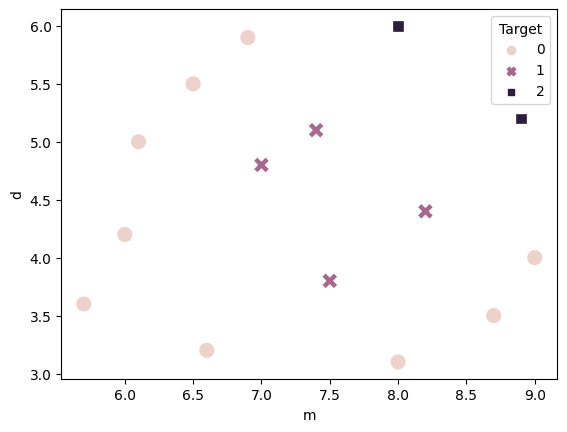

In [38]:
sns.scatterplot(x='m', y='d', data=df, hue='Target', style='Target', s=140)

In [39]:
x = df.drop('Target', axis=1)
y = df.Target

<h3>Feature Scaling</h3>

In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x)

y_train = y

In [41]:
df_sc = pd.DataFrame(x_train, columns=['d', 'm'])
df_sc['target'] = y_train
df.head()

,m,d,Target
0,6.0,4.2,0
1,5.7,3.6,0
2,6.5,5.5,0
3,6.6,3.2,0
4,6.9,5.9,0


<h3>MPL Classifier</h3>

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
model = MLPClassifier(random_state=1, verbose=True, max_iter=1000, hidden_layer_sizes=(100))
model.fit(x_train, y_train)

Iteration 1, loss = 1.07288009
Iteration 2, loss = 1.05873259
Iteration 3, loss = 1.04493245
Iteration 4, loss = 1.03147797
Iteration 5, loss = 1.01837400
Iteration 6, loss = 1.00561045
Iteration 7, loss = 0.99320275
Iteration 8, loss = 0.98111321
Iteration 9, loss = 0.96930188
Iteration 10, loss = 0.95779086
Iteration 11, loss = 0.94660329
Iteration 12, loss = 0.93571645
Iteration 13, loss = 0.92508708
Iteration 14, loss = 0.91476370
Iteration 15, loss = 0.90473056
Iteration 16, loss = 0.89499462
Iteration 17, loss = 0.88553446
Iteration 18, loss = 0.87633826
Iteration 19, loss = 0.86737701
Iteration 20, loss = 0.85863212
Iteration 21, loss = 0.85012265
Iteration 22, loss = 0.84185778
Iteration 23, loss = 0.83380040
Iteration 24, loss = 0.82595193
Iteration 25, loss = 0.81830208
Iteration 26, loss = 0.81086771
Iteration 27, loss = 0.80364947
Iteration 28, loss = 0.79661132
Iteration 29, loss = 0.78973115
Iteration 30, loss = 0.78302386
Iteration 31, loss = 0.77649138
Iteration 32, los

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=1,
              verbose=True)

In [44]:
print('score : ',model.score(x_train, y_train))
print('predict : ', model.predict(x_train))
print('target : ',np.array(y))

score :  1.0
predict :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
target :  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


In [45]:
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 3)]

In [46]:
print(model.coefs_) #weight

[array([[-2.69299561e-01,  5.41488236e-01, -5.65314742e-01,
         1.59939217e-02, -5.46907617e-01, -5.86737180e-01,
        -4.93514333e-02, -3.32580929e-01, -2.49404166e-01,
         3.94580013e-01, -2.73263330e-03, -1.00655380e-01,
        -7.62194694e-02,  5.64115493e-01, -5.50426341e-01,
         5.33081447e-01,  1.96333289e-15, -1.06388364e-01,
        -5.86736702e-01, -9.70847834e-02,  6.35828614e-01,
         2.45753150e-01, -4.11900313e-01, -1.69816126e-01,
         7.01424790e-02,  4.21786578e-01, -4.89159318e-01,
        -3.19849077e-01, -4.56914036e-01,  5.15172785e-01,
        -1.71402779e-01,  1.28524857e-01,  4.02712512e-01,
        -2.81819103e-02,  2.53988589e-01, -3.31819872e-01,
         7.11594190e-02,  5.72110914e-01, -5.88239163e-01,
         3.85517607e-01,  7.91562289e-01, -1.63564209e-01,
        -2.55420115e-02,  4.83137273e-01, -4.89343646e-01,
        -1.41172832e-01,  5.49861172e-01, -5.43125940e-02,
        -4.63562708e-01, -1.93845965e-01, -1.61906774e-

In [47]:
print(model.intercepts_) # Bias

[array([ 0.60630422, -0.13844372, -0.1557537 ,  0.09084322, -0.30917433,
        0.18130939, -0.00103596, -0.01629013,  0.5192475 , -0.14597151,
       -0.04088896,  0.5436606 , -0.23535666, -0.23521102, -0.08376796,
       -0.37585442, -0.23209456,  0.40047341,  0.04533659, -0.28348632,
       -0.40882901, -0.04219211, -0.20334977,  0.5358925 , -0.01675199,
        0.60036207,  0.12073833,  0.49067516,  0.02270106, -0.02232281,
        0.02411492,  0.06504933,  0.61442343, -0.14299713,  0.17642793,
        0.0180986 , -0.25743462, -0.21483888, -0.34371805,  0.57188416,
       -0.2798949 ,  0.59088281, -0.01488231, -0.3338911 ,  0.0062259 ,
        0.36857473, -0.33283405, -0.09675356,  0.12867825,  0.15723721,
       -0.3150325 ,  0.09025773,  0.07487834,  0.08409142, -0.03301594,
        0.43296927, -0.06988176,  0.16323583, -0.31264777, -0.17753298,
        0.3130275 ,  0.37634155, -0.12340575, -0.09282264,  0.05219589,
       -0.17120144,  0.12653203, -0.02382964, -0.21794209, -0.0

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(x_train)

class_name = ['Grape', 'Lemon', 'Orange']

print('Score -> {:.4f}'.format(model.score(x_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_name))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00         9
       Lemon       1.00      1.00      1.00         4
      Orange       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0 0]
 [0 4 0]
 [0 0 2]]


Text(0.5, 1.0, 'Confusion Matrix')

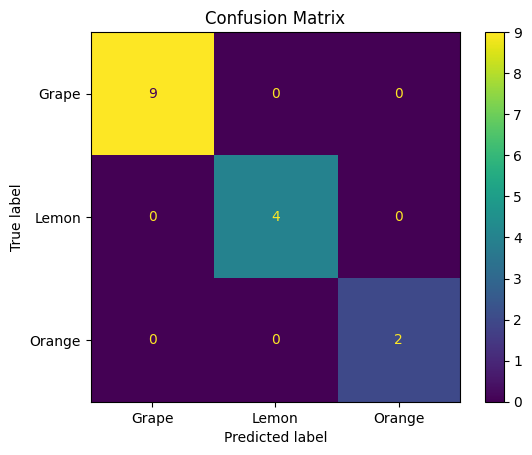

In [49]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot()
plt.title('Confusion Matrix')

Text(0, 0.5, 'd (dimention)')

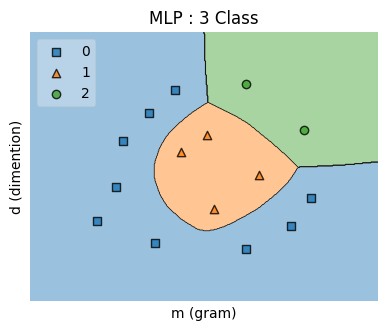

In [52]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(x_train, np.array(y_train), clf=model, legend=2)

plt.title("MLP : 3 Class")
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (dimention)')

<h3>Loss Curve</h3>

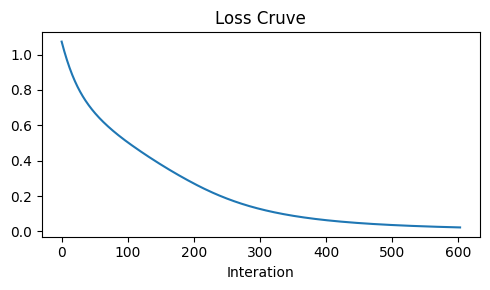

In [51]:
plt.figure(figsize=(5, 3))
plt.title('Loss Cruve')
plt.xlabel('Interation')
plt.plot(model.loss_curve_)
plt.tight_layout()

<h3>Predict</h3>

In [53]:
x_new = [[8.4, 5.2], [6.8, 4.2]]

x_new_sc = sc.fit_transform(x_new)

In [55]:
print('Prediction : ', model.predict(x_new_sc))

Prediction :  [2 0]


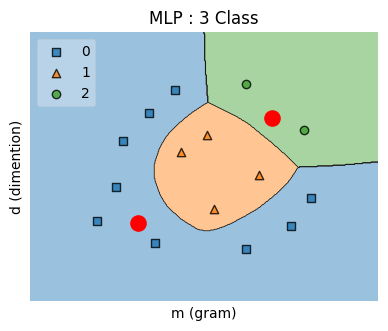

In [56]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(x_train, np.array(y_train), clf=model, legend=2)

plt.title("MLP : 3 Class")
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (dimention)')

plt.scatter(x_new_sc[:,0], x_new_sc[:,1], marker='o', s=120, c='r')